# GridSearch CV implementation

This notebook consists of classifying MBTI types using 


1.   Support Vector Machine
2.   Random Classifier
3.   Logistic Regression
4.   Decision Tree
5.   XGBoost Classifier
6.   CatBoost Classier


These 6 algorthims have been tested using 8 cross validation folds with various hyperparameters

The best parameters were eventually filtered out and applied to each model to derive the best possible results.

All training examples were used regardless of proportion of class sizes. 



In [42]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from tqdm import tqdm
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import plotly.express as px
from sklearn.metrics import accuracy_score as acs
import warnings
from sklearn.metrics import accuracy_score as acs
from sklearn.model_selection import GridSearchCV

In [43]:
!git clone https://github.com/placid-brain/CDS-Project-2021.git

fatal: destination path 'CDS-Project-2021' already exists and is not an empty directory.


In [44]:
df = pd.read_csv("/content/CDS-Project-2021/personality_dataset/mbti_basic_cleaned_dataset.csv")
df.head()

,type,posts
0,INFJ,enfp intj moments sportscenter top ten plays p...
1,ENTP,finding lack posts alarming sex boring positio...
2,INTP,good one course say know blessing curse absolu...
3,INTJ,dear intp enjoyed conversation day esoteric ga...
4,ENTJ,fired another silly misconception approaching ...


In [45]:
df["type"].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [46]:
train_df, test_df = train_test_split(df,test_size=0.3,random_state=42,stratify=df.type )

In [47]:


train_df_index_list=list(train_df.index)

test_df_index_list=list(test_df.index)


## Converting the input data

This package helps us to convert the words into a matrix of documents and a token counts to better process the text.

Whereas, LabelEncoder was used for the MBTI types to allot a number to each class

In [48]:
from sklearn.feature_extraction.text import CountVectorizer



vectorizer = CountVectorizer()
  
vectorizer.fit(df)

train_df.posts.values.astype('U')
test_df.posts.values.astype('U')

train_df_vector = vectorizer.transform(train_df.posts.values.astype('U')).toarray()

test_df_vector = vectorizer.transform(test_df.posts.values.astype('U')).toarray()

print(train_df_vector.shape)
print(test_df_vector.shape)

(6072, 2)
(2603, 2)


In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


train_df_target = le.fit_transform(train_df.type)
test_df_target = le.fit_transform(test_df.type)

print(train_df_target.shape)
print(test_df_target.shape)

(6072,)
(2603,)


In [50]:
# dictionary to store model accuracy

accuracy_record={}

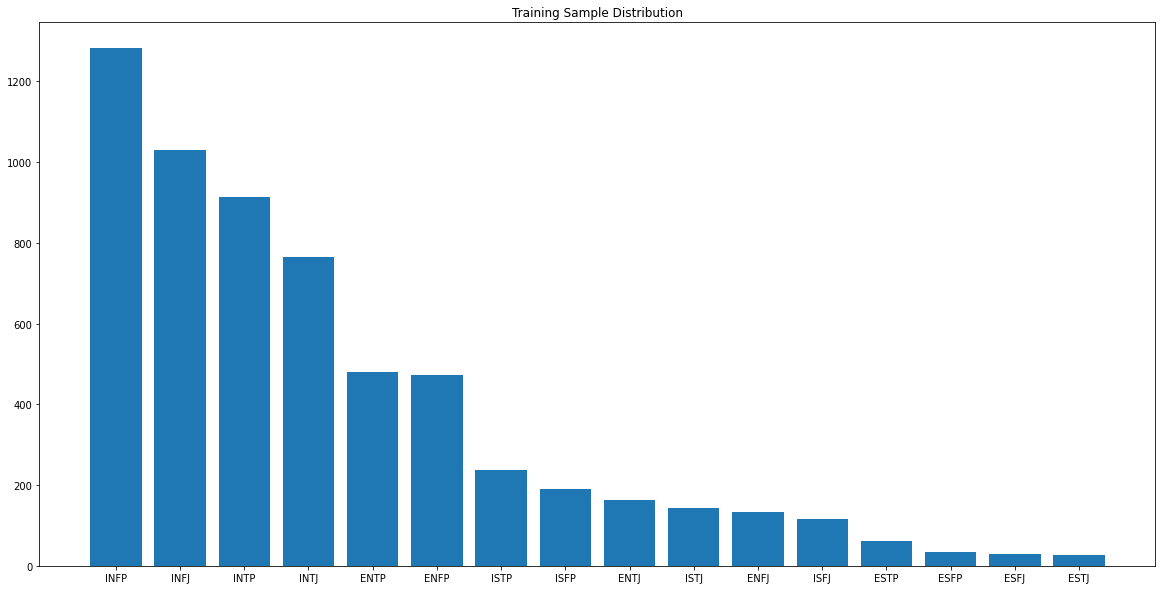

In [51]:
# Constructing training examples graph

import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(20,10))



train_label_df=pd.DataFrame(train_df['type'].value_counts())



plt.bar(train_label_df.index, train_label_df['type'])
plt.title("Training Sample Distribution")
plt.show()

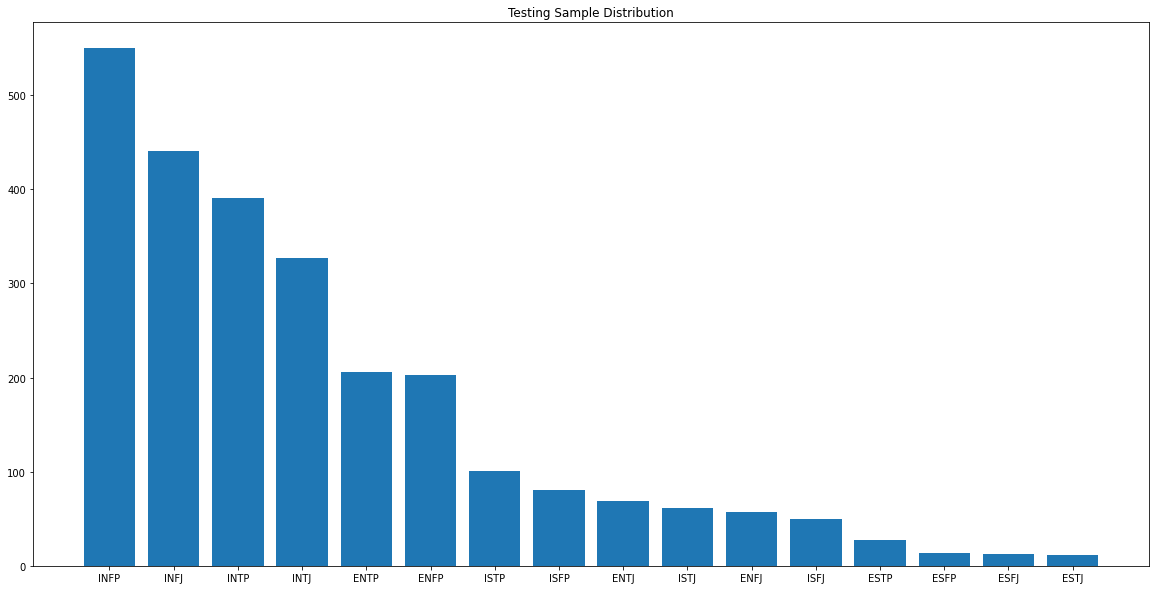

In [52]:
# Constructing testing examples graph



f, ax = plt.subplots(figsize=(20,10))



test_label_df=pd.DataFrame(test_df['type'].value_counts())



plt.bar(test_label_df.index, test_label_df['type'])
plt.title("Testing Sample Distribution")
plt.show()

## Support Vector Machine




1.   Grid Search Implementation
2.   Displaying of results in dataframe
3.   Recording accuracy of SVM in accuracy record



In [53]:
# 1


clf = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=8, return_train_score=False)
clf.fit(train_df_vector, train_df_target)



GridSearchCV(cv=8, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']})

In [54]:
# 2

drop_list = ['mean_fit_time'	,'std_fit_time'	,'mean_score_time'	,'std_score_time' ,'std_test_score'	,'rank_test_score']
result_df = pd.DataFrame(clf.cv_results_)
result_df.drop(labels=drop_list, axis=1, inplace=True)

result_df

,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score
0,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.216074,0.218709,0.218709,0.202899,0.206851,0.210804,0.212121,0.214756,0.212615
1,1,linear,"{'C': 1, 'kernel': 'linear'}",0.212121,0.212121,0.210804,0.213439,0.210804,0.204216,0.205534,0.208169,0.209651
2,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.214756,0.223979,0.217391,0.204216,0.198946,0.206851,0.209486,0.222661,0.212286
3,10,linear,"{'C': 10, 'kernel': 'linear'}",0.212121,0.212121,0.210804,0.213439,0.210804,0.204216,0.205534,0.208169,0.209651
4,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.216074,0.223979,0.212121,0.204216,0.200264,0.206851,0.213439,0.217391,0.211792
5,20,linear,"{'C': 20, 'kernel': 'linear'}",0.212121,0.212121,0.210804,0.213439,0.210804,0.204216,0.205534,0.208169,0.209651


In [55]:
# 3

i=result_df["mean_test_score"][result_df["mean_test_score"]==result_df["mean_test_score"].max()].index[0]




C = int(result_df.iloc[i,0])
kernel = str(result_df.iloc[i,1])
svm = SVC(C=C,kernel=kernel,gamma='auto')
svm.fit(train_df_vector,train_df_target)
target_pred = svm.predict(test_df_vector)

acs= acs(test_df_target,target_pred)

accuracy_record["Support Vector Machine"] = acs

print("\n")
print("\n")
print("The accuracy is: "+str(acs))
print("\n")
print("\n")







The accuracy is: 0.21091048789857855






## Random Classifier

1.   Grid Search Implementation
2.   Displaying of results in dataframe
3.   Recording accuracy of Random Classifier in accuracy record


In [56]:
# 1

param_grid = {
    
    
    'max_depth': [80, 90,100,110],
    'max_features': [2,3],
    'min_samples_leaf': [3],
    'min_samples_split': [8,10,12],
    'n_estimators': [100]
}
 

rf = RandomForestClassifier()


clf = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 8, n_jobs = -1, verbose = 2, return_train_score=False)
clf.fit(train_df_vector, train_df_target)



Fitting 8 folds for each of 24 candidates, totalling 192 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


96 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/pa

GridSearchCV(cv=8, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100]},
             verbose=2)

In [57]:
# 2

drop_list = ['mean_fit_time'	,'std_fit_time'	,'mean_score_time'	,'std_score_time' ,'std_test_score'	,'rank_test_score']
result_df = pd.DataFrame(clf.cv_results_)
result_df.drop(labels=drop_list, axis=1, inplace=True)

result_df

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score
0,80,2,3,8,100,"{'max_depth': 80, 'max_features': 2, 'min_samp...",0.217391,0.226614,0.213439,0.206851,0.200264,0.208169,0.217391,0.217391,0.213439
1,80,2,3,10,100,"{'max_depth': 80, 'max_features': 2, 'min_samp...",0.213439,0.209486,0.213439,0.205534,0.196311,0.208169,0.213439,0.214756,0.209321
2,80,2,3,12,100,"{'max_depth': 80, 'max_features': 2, 'min_samp...",0.214756,0.218709,0.210804,0.202899,0.202899,0.208169,0.213439,0.218709,0.211298
3,80,3,3,8,100,"{'max_depth': 80, 'max_features': 3, 'min_samp...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,80,3,3,10,100,"{'max_depth': 80, 'max_features': 3, 'min_samp...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,80,3,3,12,100,"{'max_depth': 80, 'max_features': 3, 'min_samp...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,90,2,3,8,100,"{'max_depth': 90, 'max_features': 2, 'min_samp...",0.216074,0.225296,0.213439,0.205534,0.193676,0.206851,0.213439,0.212121,0.210804
7,90,2,3,10,100,"{'max_depth': 90, 'max_features': 2, 'min_samp...",0.213439,0.218709,0.214756,0.206851,0.194993,0.208169,0.214756,0.217391,0.211133
8,90,2,3,12,100,"{'max_depth': 90, 'max_features': 2, 'min_samp...",0.216074,0.223979,0.212121,0.204216,0.197628,0.208169,0.213439,0.217391,0.211627
9,90,3,3,8,100,"{'max_depth': 90, 'max_features': 3, 'min_samp...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# 3

from sklearn.metrics import accuracy_score as acs
#uncomment earlier line and run agin if u get a numpy.float64' object is not callable error


i=result_df["mean_test_score"][result_df["mean_test_score"]==result_df["mean_test_score"].max()].index[0]



max_depth = int(result_df.iloc[i,0])
max_features= int(result_df.iloc[i,1])
min_samples_leaf= int(result_df.iloc[i,2])
min_samples_split= int(result_df.iloc[i,3])
n_estimators= int(result_df.iloc[i,4])


rf = RandomForestClassifier(max_depth=max_depth ,max_features = max_features, min_samples_leaf=min_samples_leaf, n_estimators=n_estimators )
rf.fit(train_df_vector,train_df_target)

target_pred = rf.predict(test_df_vector)

acs= acs(test_df_target,target_pred)

accuracy_record["Random Forest"] = acs

print("\n")
print("\n")
print("The accuracy is: "+str(acs))
print("\n")
print("\n")






The accuracy is: 0.2047637341529005






## Logistic Regression

1. Grid Search Implementation
2. Displaying of results in dataframe
3. Recording accuracy of Logistic Regression in accuracy record

In [59]:
# 1

from sklearn.linear_model import LogisticRegression

param_grid= {
    "C":[1,5,10],
    "penalty":["l1","l2","elasticnet","none"],
    "solver":["saga"]
}
lr = LogisticRegression()

clf = GridSearchCV(lr, param_grid, cv=8)
clf.fit(train_df_vector, train_df_target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn

GridSearchCV(cv=8, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['saga']})

In [60]:
# 2

drop_list = ['mean_fit_time'	,'std_fit_time'	,'mean_score_time'	,'std_score_time' ,'std_test_score'	,'rank_test_score']
result_df = pd.DataFrame(clf.cv_results_)
result_df.drop(labels=drop_list, axis=1, inplace=True)

result_df

,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score
0,1,l1,saga,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.225296,0.210804,0.221344,0.212121,0.213439,0.208169,0.208169,0.210804,0.213768
1,1,l2,saga,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.225296,0.210804,0.221344,0.212121,0.213439,0.209486,0.208169,0.210804,0.213933
2,1,elasticnet,saga,"{'C': 1, 'penalty': 'elasticnet', 'solver': 's...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,none,saga,"{'C': 1, 'penalty': 'none', 'solver': 'saga'}",0.225296,0.210804,0.221344,0.212121,0.213439,0.209486,0.208169,0.210804,0.213933
4,5,l1,saga,"{'C': 5, 'penalty': 'l1', 'solver': 'saga'}",0.225296,0.210804,0.221344,0.212121,0.213439,0.209486,0.208169,0.210804,0.213933
5,5,l2,saga,"{'C': 5, 'penalty': 'l2', 'solver': 'saga'}",0.225296,0.210804,0.221344,0.212121,0.213439,0.209486,0.208169,0.210804,0.213933
6,5,elasticnet,saga,"{'C': 5, 'penalty': 'elasticnet', 'solver': 's...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,none,saga,"{'C': 5, 'penalty': 'none', 'solver': 'saga'}",0.225296,0.210804,0.221344,0.212121,0.213439,0.209486,0.208169,0.210804,0.213933
8,10,l1,saga,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.225296,0.210804,0.221344,0.212121,0.213439,0.209486,0.208169,0.210804,0.213933
9,10,l2,saga,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",0.225296,0.210804,0.221344,0.212121,0.213439,0.209486,0.208169,0.210804,0.213933


In [61]:
# 3

from sklearn.metrics import accuracy_score as acs
#uncomment earlier line and run agin if u get a numpy.float64' object is not callable error


i=result_df["mean_test_score"][result_df["mean_test_score"]==result_df["mean_test_score"].max()].index[0]



C = int(result_df.iloc[i,0])
penalty =str(result_df.iloc[i,1])
solver= str(result_df.iloc[i,2])


lr = LogisticRegression(C=C, penalty= penalty, solver= solver)
lr.fit(train_df_vector,train_df_target)

target_pred = lr.predict(test_df_vector)

acs= acs(test_df_target,target_pred)

accuracy_record["Logistic Regression"] = acs

print("\n")
print("\n")
print("The accuracy is: "+str(acs))
print("\n")
print("\n")






The accuracy is: 0.20898962735305418






/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



## Decision Trees

1. Grid Search Implementation
2. Displaying of results in dataframe
3. Recording accuracy of Decision Tree in accuracy record

In [62]:
# 1

from sklearn.tree import DecisionTreeClassifier

param_grid={
    
    'max_depth': [80, 90,100,110],
    'max_features': [2,3],
    'min_samples_leaf': [3],
    'min_samples_split': [8,10,12],
    'random_state': [42,20,10],
    'max_leaf_nodes': [2,3,4]
    
    
}

dt = DecisionTreeClassifier()
print(dt.get_params(deep=True))

clf = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 8, verbose = 2, return_train_score=False)

clf.fit(train_df_vector,train_df_target)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Fitting 8 folds for each of 216 candidates, totalling 1728 fits
[CV] END max_depth=80, max_features=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=8, random_state=42; total time=   0.0s
[CV] END max_depth=80, max_features=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=8, random_state=42; total time=   0.0s
[CV] END max_depth=80, max_features=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=8, random_state=42; total time=   0.0s
[CV] END max_depth=80, max_features=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=8, random_state=42; total time=   0.0s
[CV] END max_depth=80, max_features=2, max_leaf_nodes=2, min_samples_leaf=3, min_samples_split=8, random_state=42; total 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


864 fits failed out of a total of 1728.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
864 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in 

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'max_leaf_nodes': [2, 3, 4],
                         'min_samples_leaf': [3],
                         'min_samples_split': [8, 10, 12],
                         'random_state': [42, 20, 10]},
             verbose=2)

In [63]:
# 2

drop_list = ['mean_fit_time'	,'std_fit_time'	,'mean_score_time'	,'std_score_time' ,'std_test_score'	,'rank_test_score']
result_df = pd.DataFrame(clf.cv_results_)
result_df.drop(labels=drop_list, axis=1, inplace=True)

result_df

,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score
0,80,2,2,3,8,42,"{'max_depth': 80, 'max_features': 2, 'max_leaf...",0.212121,0.212121,0.210804,0.210804,0.210804,0.205534,0.210804,0.197628,0.208827
1,80,2,2,3,8,20,"{'max_depth': 80, 'max_features': 2, 'max_leaf...",0.212121,0.212121,0.210804,0.210804,0.210804,0.205534,0.210804,0.197628,0.208827
2,80,2,2,3,8,10,"{'max_depth': 80, 'max_features': 2, 'max_leaf...",0.212121,0.212121,0.210804,0.210804,0.210804,0.205534,0.210804,0.197628,0.208827
3,80,2,2,3,10,42,"{'max_depth': 80, 'max_features': 2, 'max_leaf...",0.212121,0.212121,0.210804,0.210804,0.210804,0.205534,0.210804,0.197628,0.208827
4,80,2,2,3,10,20,"{'max_depth': 80, 'max_features': 2, 'max_leaf...",0.212121,0.212121,0.210804,0.210804,0.210804,0.205534,0.210804,0.197628,0.208827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,110,3,4,3,10,20,"{'max_depth': 110, 'max_features': 3, 'max_lea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,110,3,4,3,10,10,"{'max_depth': 110, 'max_features': 3, 'max_lea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,110,3,4,3,12,42,"{'max_depth': 110, 'max_features': 3, 'max_lea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,110,3,4,3,12,20,"{'max_depth': 110, 'max_features': 3, 'max_lea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# 3

from sklearn.metrics import accuracy_score as acs
#uncomment earlier line and run agin if u get a numpy.float64' object is not callable error


i=result_df["mean_test_score"][result_df["mean_test_score"]==result_df["mean_test_score"].max()].index[0]



max_depth = int(result_df.iloc[i,0])
max_features= int(result_df.iloc[i,1])
min_samples_leaf= int(result_df.iloc[i,2])
min_samples_split= int(result_df.iloc[i,3])
random_state= int(result_df.iloc[i,4])
max_leaf_nodes=int(result_df.iloc[i,5])


dt = DecisionTreeClassifier(max_depth=max_depth ,max_features = max_features, min_samples_leaf=min_samples_leaf,min_samples_split= min_samples_split ,random_state=random_state,   max_leaf_nodes=max_leaf_nodes )
dt.fit(train_df_vector,train_df_target)

target_pred = dt.predict(test_df_vector)

acs= acs(test_df_target,target_pred)

accuracy_record["Decision Tree"] = acs

print("\n")
print("\n")
print("The accuracy is: "+str(acs))
print("\n")
print("\n")






The accuracy is: 0.20937379946215906






## XGBoost Classifier

1. Grid Search Implementation
2. Displaying of results in dataframe
3. Recording accuracy of XGBoost Classifier in accuracy record

In [65]:
# 1

import xgboost as xgb

param_grid={
    
    
    'max_depth': [5,10],
    
    'max_delta_step': [1,3],
    
    'learning_rate': [0.1,0.5],
    'n_estimators': [50,100]
    
    
}

xgb = xgb.XGBClassifier()


clf = GridSearchCV(estimator = xgb , param_grid = param_grid, 
                          cv = 8, verbose = 2, return_train_score=False)

clf.fit(train_df_vector,train_df_target)

Fitting 8 folds for each of 16 candidates, totalling 128 fits
[CV] END learning_rate=0.1, max_delta_step=1, max_depth=5, n_estimators=50; total time=   1.2s
[CV] END learning_rate=0.1, max_delta_step=1, max_depth=5, n_estimators=50; total time=   1.2s
[CV] END learning_rate=0.1, max_delta_step=1, max_depth=5, n_estimators=50; total time=   1.2s
[CV] END learning_rate=0.1, max_delta_step=1, max_depth=5, n_estimators=50; total time=   1.2s
[CV] END learning_rate=0.1, max_delta_step=1, max_depth=5, n_estimators=50; total time=   1.2s
[CV] END learning_rate=0.1, max_delta_step=1, max_depth=5, n_estimators=50; total time=   1.2s
[CV] END learning_rate=0.1, max_delta_step=1, max_depth=5, n_estimators=50; total time=   1.1s
[CV] END learning_rate=0.1, max_delta_step=1, max_depth=5, n_estimators=50; total time=   1.1s
[CV] END learning_rate=0.1, max_delta_step=1, max_depth=5, n_estimators=100; total time=   2.3s
[CV] END learning_rate=0.1, max_delta_step=1, max_depth=5, n_estimators=100; total

GridSearchCV(cv=8, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.1, 0.5], 'max_delta_step': [1, 3],
                         'max_depth': [5, 10], 'n_estimators': [50, 100]},
             verbose=2)

In [66]:
# 2

drop_list = ['mean_fit_time'	,'std_fit_time'	,'mean_score_time'	,'std_score_time' ,'std_test_score'	,'rank_test_score']
result_df = pd.DataFrame(clf.cv_results_)
result_df.drop(labels=drop_list, axis=1, inplace=True)

result_df

,param_learning_rate,param_max_delta_step,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score
0,0.1,1,5,50,"{'learning_rate': 0.1, 'max_delta_step': 1, 'm...",0.216074,0.202899,0.221344,0.205534,0.202899,0.209486,0.212121,0.225296,0.211957
1,0.1,1,5,100,"{'learning_rate': 0.1, 'max_delta_step': 1, 'm...",0.216074,0.213439,0.220026,0.206851,0.201581,0.212121,0.209486,0.225296,0.213109
2,0.1,1,10,50,"{'learning_rate': 0.1, 'max_delta_step': 1, 'm...",0.216074,0.223979,0.214756,0.204216,0.200264,0.206851,0.213439,0.217391,0.212121
3,0.1,1,10,100,"{'learning_rate': 0.1, 'max_delta_step': 1, 'm...",0.217391,0.223979,0.214756,0.204216,0.201581,0.208169,0.213439,0.212121,0.211957
4,0.1,3,5,50,"{'learning_rate': 0.1, 'max_delta_step': 3, 'm...",0.217391,0.202899,0.221344,0.205534,0.205534,0.209486,0.212121,0.221344,0.211957
5,0.1,3,5,100,"{'learning_rate': 0.1, 'max_delta_step': 3, 'm...",0.216074,0.213439,0.220026,0.204216,0.202899,0.210804,0.208169,0.222661,0.212286
6,0.1,3,10,50,"{'learning_rate': 0.1, 'max_delta_step': 3, 'm...",0.216074,0.223979,0.213439,0.204216,0.200264,0.206851,0.213439,0.217391,0.211957
7,0.1,3,10,100,"{'learning_rate': 0.1, 'max_delta_step': 3, 'm...",0.217391,0.223979,0.216074,0.204216,0.200264,0.208169,0.213439,0.212121,0.211957
8,0.5,1,5,50,"{'learning_rate': 0.5, 'max_delta_step': 1, 'm...",0.213439,0.208169,0.217391,0.204216,0.198946,0.208169,0.208169,0.217391,0.209486
9,0.5,1,5,100,"{'learning_rate': 0.5, 'max_delta_step': 1, 'm...",0.214756,0.209486,0.216074,0.204216,0.200264,0.208169,0.208169,0.217391,0.209816


In [67]:
# 3

from sklearn.metrics import accuracy_score as acs
#uncomment earlier line and run agin if u get a numpy.float64' object is not callable error


i=result_df["mean_test_score"][result_df["mean_test_score"]==result_df["mean_test_score"].max()].index[0]



max_depth = int(result_df.iloc[i,0])
max_delta_step= int(result_df.iloc[i,1])
learning_rate= float(result_df.iloc[i,2])
n_estimators= int(result_df.iloc[i,3])



xgb = XGBClassifier(max_depth=max_depth ,max_delta_step = max_delta_step, learning_rate=learning_rate,n_estimators= n_estimators  )

xgb.fit(train_df_vector,train_df_target)

target_pred = xgb.predict(test_df_vector)

acs= acs(test_df_target,target_pred)

accuracy_record["XGBoost Classifier"] = acs

print("\n")
print("\n")
print("The accuracy is: "+str(acs))
print("\n")
print("\n")






The accuracy is: 0.15021129466000768






## CatBoost Classifier

1. Grid Search Implementation
2. Displaying of results in dataframe
3. Recording accuracy of CatBoost Classifier in accuracy record

In [68]:
# 1
!pip3 install catboost
from catboost import CatBoostClassifier

param_grid={
    
    
    
    'depth': [4,5],
    
    
    
    'learning_rate': [0.1,0.5]
 
    
    
}

catboost = CatBoostClassifier()


clf = GridSearchCV(estimator = catboost , param_grid = param_grid, 
                          cv = 8, verbose = 2, return_train_score=False)

clf.fit(train_df_vector,train_df_target)

Streaming output truncated to the last 5000 lines.
4:	learn: 2.2672668	total: 24.5ms	remaining: 4.87s
5:	learn: 2.2638769	total: 29.1ms	remaining: 4.82s
6:	learn: 2.2609324	total: 34ms	remaining: 4.83s
7:	learn: 2.2581607	total: 39.2ms	remaining: 4.86s
8:	learn: 2.2569651	total: 44.1ms	remaining: 4.86s
9:	learn: 2.2561307	total: 48.8ms	remaining: 4.83s
10:	learn: 2.2555523	total: 53.4ms	remaining: 4.8s
11:	learn: 2.2544363	total: 58.4ms	remaining: 4.8s
12:	learn: 2.2536650	total: 63ms	remaining: 4.78s
13:	learn: 2.2521619	total: 68ms	remaining: 4.79s
14:	learn: 2.2514608	total: 72.9ms	remaining: 4.79s
15:	learn: 2.2509260	total: 78.1ms	remaining: 4.8s
16:	learn: 2.2504825	total: 83.1ms	remaining: 4.8s
17:	learn: 2.2496040	total: 88.1ms	remaining: 4.81s
18:	learn: 2.2490857	total: 92.9ms	remaining: 4.8s
19:	learn: 2.2474989	total: 98.2ms	remaining: 4.81s
20:	learn: 2.2460077	total: 103ms	remaining: 4.82s
21:	learn: 2.2455509	total: 108ms	remaining: 4.81s
22:	learn: 2.2435279	total: 114m

GridSearchCV(cv=8,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f7a37c6f710>,
             param_grid={'depth': [4, 5], 'learning_rate': [0.1, 0.5]},
             verbose=2)

In [69]:
# 2

drop_list = ['mean_fit_time'	,'std_fit_time'	,'mean_score_time'	,'std_score_time' ,'std_test_score'	,'rank_test_score']
result_df = pd.DataFrame(clf.cv_results_)
result_df.drop(labels=drop_list, axis=1, inplace=True)

result_df

,param_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score
0,4,0.1,"{'depth': 4, 'learning_rate': 0.1}",0.214756,0.223979,0.212121,0.204216,0.198946,0.206851,0.213439,0.212121,0.210804
1,4,0.5,"{'depth': 4, 'learning_rate': 0.5}",0.213439,0.223979,0.212121,0.204216,0.193676,0.206851,0.213439,0.210804,0.209816
2,5,0.1,"{'depth': 5, 'learning_rate': 0.1}",0.216074,0.218709,0.212121,0.204216,0.191041,0.208169,0.213439,0.210804,0.209321
3,5,0.5,"{'depth': 5, 'learning_rate': 0.5}",0.213439,0.223979,0.213439,0.204216,0.193676,0.208169,0.213439,0.216074,0.210804


In [70]:
# 3

from sklearn.metrics import accuracy_score as acs
#uncomment earlier line and run agin if u get a numpy.float64' object is not callable error


i=result_df["mean_test_score"][result_df["mean_test_score"]==result_df["mean_test_score"].max()].index[0]




depth= int(result_df.iloc[i,0])
learning_rate= float(result_df.iloc[i,1])



catboost = CatBoostClassifier(  loss_function='MultiClass',eval_metric='MultiClass'  , depth=depth      ,  learning_rate=learning_rate )

catboost.fit(train_df_vector,train_df_target)

target_pred = catboost.predict(test_df_vector)

acs= acs(test_df_target,target_pred)

accuracy_record["Catboost Classifier"] = acs

print("\n")
print("\n")
print("The accuracy is: "+str(acs))
print("\n")
print("\n")



0:	learn: 2.6734327	total: 5.88ms	remaining: 5.87s
1:	learn: 2.5995276	total: 10.9ms	remaining: 5.44s
2:	learn: 2.5423145	total: 16.5ms	remaining: 5.49s
3:	learn: 2.4969528	total: 21.5ms	remaining: 5.35s
4:	learn: 2.4601142	total: 26.8ms	remaining: 5.33s
5:	learn: 2.4299392	total: 31.9ms	remaining: 5.29s
6:	learn: 2.4049457	total: 36.9ms	remaining: 5.23s
7:	learn: 2.3840346	total: 42ms	remaining: 5.2s
8:	learn: 2.3664700	total: 47.2ms	remaining: 5.19s
9:	learn: 2.3515966	total: 52.5ms	remaining: 5.2s
10:	learn: 2.3388891	total: 57.6ms	remaining: 5.18s
11:	learn: 2.3281389	total: 62.5ms	remaining: 5.15s
12:	learn: 2.3188614	total: 68.3ms	remaining: 5.18s
13:	learn: 2.3110629	total: 73.7ms	remaining: 5.19s
14:	learn: 2.3042817	total: 79.2ms	remaining: 5.2s
15:	learn: 2.2985467	total: 84.3ms	remaining: 5.18s
16:	learn: 2.2935137	total: 89.9ms	remaining: 5.2s
17:	learn: 2.2889598	total: 95.4ms	remaining: 5.21s
18:	learn: 2.2852587	total: 101ms	remaining: 5.2s
19:	learn: 2.2822605	total: 10

## Accuracy data

In [71]:
print(accuracy_record)

{'Support Vector Machine': 0.21091048789857855, 'Random Forest': 0.2047637341529005, 'Logistic Regression': 0.20898962735305418, 'Decision Tree': 0.20937379946215906, 'XGBoost Classifier': 0.15021129466000768, 'Catboost Classifier': 0.20630042258932002}
